# Positional Probability

https://ui.adsabs.harvard.edu/abs/2024MNRAS.527.4018H/abstract

The notebook walkthroughs the steps in generating positional probabilities for a single target.

In [2]:
from CandidateSet import CandidateSet as cs

import pandas as pd  # for display purposes

%matplotlib inline

## Specify and review the TIC and the transits

In [3]:
ticid, sector, lc_type = 279740441, [34], "TESS-SPOC"

# define: per, t0,    tdur, depth
# units:  days, btjd, days, ppm
per, t0, tdur , depth = 0.7423106, 2229.007, 1.3775 / 24, 1877  # from (S0034-S0034) TCE_1


# the following can generally be used as is without modification
candidate = .01  # a marker, in case there are multiple candidates for a target. 
csv_name = f"{ticid}.csv"
csv_path = f"Input/{csv_name}"
lc_dir = f"Lightcurves/{ticid}"

In [4]:
# downloading the specified lightcurves from MAST with `lightkurve`

import os
import shutil
import lightkurve as lk

sr = lk.search_lightcurve(f"TIC{ticid}", mission="TESS", sector=sector, author=lc_type)
display(sr)
lcc = sr.download_all()



#,mission,year,author,exptime,target_name,distance,proposal_id
,,,,s,,arcsec,
0,TESS Sector 34,2021,TESS-SPOC,600,279740441,0.0,N/A


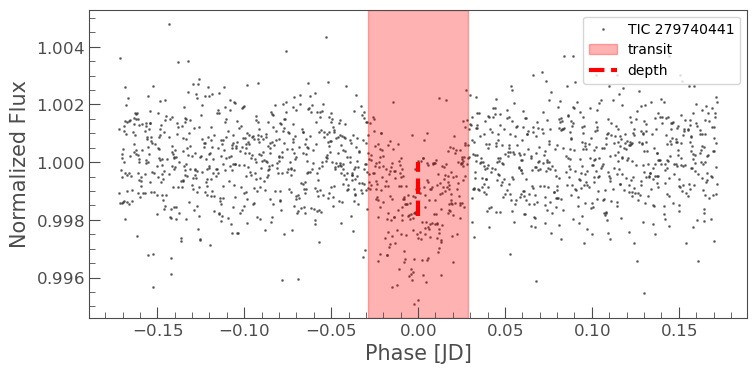

In [5]:
# Visualize the transit specified

ax = lcc.stitch().fold(period=per, epoch_time=t0).truncate(0 - tdur*3, 0 + tdur*3).scatter(alpha=0.6);
ax.axvspan(xmin=0 - tdur/2, xmax=0 + tdur/2, color="red", alpha=0.3, label="transit");
ax.vlines(0, ymax=1, ymin=1 - depth/1000000, linestyle="--", color="red", lw=3, label="depth");
ax.legend(loc="upper right");


## Prepare the inputs for `PositionalProbability`

In [6]:
# 1. Copy the LC files to the expected directory
shutil.rmtree(lc_dir, ignore_errors=True)  # to only specified sectors are considered, by removing any previously copied LCs
os.makedirs(lc_dir, exist_ok=True)
for lc in lcc:
    shutil.copy(lc.filename, lc_dir)

print(f"{len(lcc)} lightcurve file(s) available at {lc_dir} for calculating positional probability.")


# 2. Create the csv that specifies the transit

csv_str = f"""\
ticid,candidate,per,t0,tdur,depth
{ticid},{candidate},{per},{t0},{tdur},{depth}
"""

with open(csv_path, "w") as csv_out:
    csv_out.write(csv_str)
print("Transit spec is saved in:", csv_path, "; the contents:")
print(csv_str)

1 lightcurve file(s) available at Lightcurves/279740441 for calculating positional probability.
Transit spec is saved in: Input/279740441.csv ; the contents:
ticid,candidate,per,t0,tdur,depth
279740441,0.01,0.7423106,2229.007,0.05739583333333333,1877



## Run `PositionalProbability`

Goto <a href="#results">results</a>.

In [7]:
cset = cs.CandidateSet(csv_name, lc_type=lc_type, save_output=False, plot_centroid=True)

# display(cset.data)  # the csv is loaded into .data

# Retrieve required data for the target stars from the TIC, including the nearby sources.
cset.generate_sources(infile=None)
# display(vars(cset.sources[ticid]))
print("Rs:", cset.sources[ticid].star_rad, "; Ms:", cset.sources[ticid].star_mass, " ; teff:", cset.sources[ticid].teff, " ; mags:", cset.sources[ticid].mags)
display(cset.sources[ticid].nearby_data)

Retrieving data from MAST for 1 targets
Source identification and object creation completed.
Rs: 0.719998 ; Ms: 0.67  ; teff: 4304.6  ; mags: {'TESS': (11.481, 0.006), 'G': (12.2246, 0.000212), 'V': (12.569, 0.16)}


,Gaia_id,ra,dec,pmra,pmdec,rad,mass,Teff,Tmag,e_Tmag,Gmag,e_Gmag,Vmag,e_Vmag,disposition,objType,Flux
ticid,,,,,,,,,,,,,,,,,
279740441,4672194415343063040,51.504472,-64.548108,-21.478500,109.970000,0.719998,0.670000,4304.6,11.4810,0.006000,12.2246,0.000212,12.5690,0.1600,NaN,STAR,3834.345641
650411950,4672194415342142720,51.506660,-64.548815,20.816900,12.122700,NaN,NaN,NaN,19.7113,0.600000,20.1413,0.015126,NaN,NaN,NaN,STAR,1.956912
279740440,4672194411046777472,51.500972,-64.547738,20.241900,-14.039000,1.447510,1.430000,6723.0,12.0242,0.006000,12.3395,0.000253,12.1660,0.0320,NaN,STAR,2324.937375
650411951,4672194415342312064,51.499909,-64.548616,21.152300,-13.748900,NaN,NaN,NaN,18.3431,0.055100,18.7501,0.004932,18.8766,0.0676,NaN,STAR,6.900034
279740439,4672194449702801792,51.522390,-64.538796,18.104700,11.872900,0.941479,0.620000,3981.0,13.5872,0.006000,14.4656,0.000413,15.0500,0.1370,NaN,STAR,551.075698
279740442,4672188539827801728,51.473752,-64.552748,0.000000,0.000000,NaN,NaN,NaN,19.3440,0.028300,20.0692,0.012715,20.4734,0.0652,NaN,STAR,2.744677
650411952,4672194548485881728,51.526810,-64.534293,0.103630,-2.029780,NaN,NaN,NaN,20.3949,0.023900,20.6604,0.010288,20.7256,0.0619,NaN,STAR,1.042633
279740444,4672182591297071104,51.541003,-64.565742,20.148200,14.154700,NaN,NaN,3499.0,19.0364,0.008000,20.1516,0.005286,21.3495,0.1392,NaN,STAR,3.643605
279740443,4672188745986231680,51.453641,-64.557389,1.199200,-5.673130,0.385291,0.374784,3360.0,16.6812,0.008886,17.9405,0.001224,19.1805,0.0524,NaN,STAR,31.886824


In [8]:
# Determine the per sector transit characteristics
cset.generate_per_sector_data(infile=None)
display(cset.sector_data)

Running sector_data update for 1 targets


,,,t0,per,sec_tdur,sec_tdur23,sec_depth,sec_flux,sec_time
ticid,candidate,sector,,,,,,,
279740441,0.01,34,2229.007,0.742311,0.057441,0.021748,1856.161674,4123.075195,2229.204163


Running centroid data retrieval for 1 targets


,,,cam,ccd,X_diff,X_err,Y_diff,Y_err,flag
ticid,candidate,sector,,,,,,,
279740441,0.01,34,4,3,0.000641,0.000097,-0.001314,0.000118,


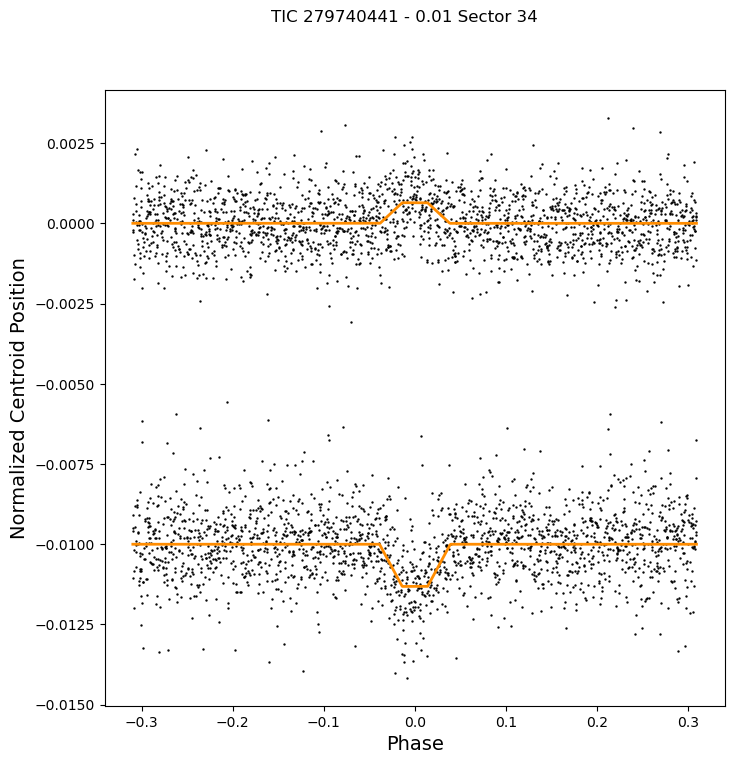

In [9]:
# Measure the observed photometric centroid
cset.generate_centroiddata(infile=None)
display(cset.centroid)

In [10]:
# Produce estimated flux contributions of nearby sources in the aperture
cset.estimate_flux_fractions()

with pd.option_context('display.float_format', '{:.4f}'.format):
    display(cset.sources[ticid].nearby_fractions)

,S34
ticid,
279740441,0.6030
650411950,0.0003
279740440,0.3596
650411951,0.0010
279740439,0.0355
279740442,0.0001
650411952,0.0000
279740444,0.0000
279740443,0.0000


In [11]:
# Determine the implied eclipse depth
cset.estimate_nearby_depths()

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(cset.sources[ticid].nearby_depths)  # output shown in ppm

,,S34,Mean
ticid,candidate,,
279740441,0.01,"1,856.16","1,856.16"
650411950,0.01,"3,673,890.17","3,673,890.17"
279740440,0.01,"3,112.79","3,112.79"
650411951,0.01,"1,069,275.93","1,069,275.93"
279740439,0.01,"31,495.06","31,495.06"
279740442,0.01,"22,136,975.45","22,136,975.45"
650411952,0.01,"86,291,373.15","86,291,373.15"
279740444,0.01,"224,372,803.73","224,372,803.73"
279740443,0.01,"28,935,993.82","28,935,993.82"


In [12]:
# Generate positional probabilities
cset.generate_probabilities()
# results in cset.probabilities

Generating Positional Probabilities
Positional Probabilities generated!


## Results
<a name="results"></a>

In [13]:
with pd.option_context('display.float_format', '{:,.4f}'.format):
    display(cset.probabilities)
n = 20
print(f"Assessment (nearest {n}):")
display(cset.assessment.head(n))

MaxProb  MeanProb  MedianProb  MaxNormProb  \
target    candidate source                                                  
279740441 0.0100    279740439   0.7102    0.7102      0.7102       1.0000   
                    279740441   0.0000    0.0000      0.0000       0.0000   

                               MeanNormProb  MedianNormProb  \
target    candidate source                                    
279740441 0.0100    279740439        1.0000          1.0000   
                    279740441        0.0000          0.0000   

                               PositionalProbability Disposition  
target    candidate source                                        
279740441 0.0100    279740439                 1.0000         NFP  
                    279740441                 0.0000         TCE

Assessment (nearest 20):


Possible                      Rejection Reason
target    candidate source                                                   
279740441 0.01      279740441     False  Centroid probability below threshold
                    650411950     False               Eclipse depth above max
                    279740440     False  Centroid probability below threshold
                    650411951     False  Centroid probability below threshold
                    279740439      True                                      
                    279740442     False               Eclipse depth above max
                    650411952     False               Eclipse depth above max
                    279740444     False               Eclipse depth above max
                    279740443     False               Eclipse depth above max
                    650411860     False               Eclipse depth above max
                    279740438     False               Eclipse depth above max
                    279740445     False               Eclipse depth above max
                    650411749     False               Eclipse depth above max
                    279740434     False               Eclipse depth above max
                    650411748     False               Eclipse depth above max
                    650411953     False               Eclipse depth above max
                    650411954     False               Eclipse depth above max
                    650411955     False               Eclipse depth above max
                    279740429     False               Eclipse depth above max
                    279740448     False               Eclipse depth above max